In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#### PART 2: DATA ACQUISITION AND INSPECTION

In [30]:
# Load Dataset
df = pd.read_csv("../data/Affordable_Housing_by_Town_2011-2023.csv")

In [31]:
# Shape
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Shape: 2197 rows × 10 columns


In [32]:
# First & Last Rows
display(df.head())
display(df.tail())

,Year,Town Code,Town,Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
0,2023,1,Andover,1324,24.0,1,26,0,51,3.85
1,2022,1,Andover,1317,24.0,1,27,0,52,3.95
2,2021,1,Andover,1317,24.0,1,29,0,54,4.10
3,2020,1,Andover,1317,18.0,1,32,0,51,3.87
4,2019,1,Andover,1317,18.0,1,29,0,48,3.64


,Year,Town Code,Town,Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
2192,2015,169,Woodstock,3582,24.0,2,72,0,98,2.74
2193,2014,169,Woodstock,3582,24.0,3,72,0,99,2.76
2194,2013,169,Woodstock,3582,24.0,3,87,0,114,3.18
2195,2012,169,Woodstock,3582,24.0,3,52,0,79,2.21
2196,2011,169,Woodstock,3582,24.0,3,39,0,66,1.84


In [33]:
# Data Types & Info
print("Column Data Types:")
print(df.dtypes)
print()
df.info()

Column Data Types:
Year                                     int64
Town Code                                int64
Town                                       str
Census Units                             int64
Government Assisted                    float64
Tenant Rental Assistance                 int64
 Single Family CHFA/ USDA Mortgages      int64
Deed Restricted Units                    int64
Total Assisted Units                     int64
Percent Affordable                     float64
dtype: object

<class 'pandas.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2197 non-null   int64  
 1   Town Code                            2197 non-null   int64  
 2   Town                                 2197 non-null   str    
 3   Census Units                         2197 non-null   int64  
 4  

In [34]:
# Statistical Summary
display(df.describe().T)
display(df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
Year,2197.0,2017.000000,3.742509,2011.0,2014.00,2017.00,2020.00,2023.00
Town Code,2197.0,85.000000,48.796350,1.0,43.00,85.00,127.00,169.00
Census Units,2197.0,8823.345016,10477.528989,377.0,2306.00,5451.00,10061.00,58874.00
Government Assisted,2196.0,539.163024,1344.422487,0.0,24.00,137.00,377.00,10755.00
Tenant Rental Assistance,2197.0,265.556668,941.298542,0.0,2.00,7.00,88.00,9132.00
Single Family CHFA/ USDA Mortgages,2197.0,164.710514,281.903834,0.0,18.00,51.00,185.00,2429.00
Deed Restricted Units,2197.0,32.737369,123.748175,0.0,0.00,0.00,17.00,1295.00
Total Assisted Units,2197.0,1001.922167,2531.643531,0.0,51.00,221.00,687.00,21165.00
Percent Affordable,2197.0,6.194725,6.154995,0.0,2.17,4.22,7.73,40.76


,count,unique,top,freq
Town,2197,169,Andover,13


In [35]:
# Unique Values per Column
print("Unique Value Counts:")
for col in df.columns:
    print(f"  {col}: {df[col].nunique()}")

Unique Value Counts:
  Year: 13
  Town Code: 169
  Town: 169
  Census Units: 332
  Government Assisted: 409
  Tenant Rental Assistance: 489
   Single Family CHFA/ USDA Mortgages: 505
  Deed Restricted Units: 157
  Total Assisted Units: 990
  Percent Affordable: 1078


In [36]:
# Missing Values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
display(pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct}))

,Missing Count,Missing %
Year,0,0.00
Town Code,0,0.00
Town,0,0.00
Census Units,0,0.00
Government Assisted,1,0.05
Tenant Rental Assistance,0,0.00
Single Family CHFA/ USDA Mortgages,0,0.00
Deed Restricted Units,0,0.00
Total Assisted Units,0,0.00
Percent Affordable,0,0.00


In [37]:
# Duplicate Rows
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


In [38]:
# Year and Town Coverage
print(f"Year Range: {df['Year'].min()} – {df['Year'].max()}")
print(f"Total Towns: {df['Town'].nunique()}")

Year Range: 2011 – 2023
Total Towns: 169


In [39]:
# Percent Affordable Range
print(f"Percent Affordable — Min: {df['Percent Affordable'].min()}, Max: {df['Percent Affordable'].max()}")

Percent Affordable — Min: 0.0, Max: 40.76


#### PART 3: DATA CLEANING AND PREPARATION


In [40]:
df_clean = df.copy()

In [41]:
df_clean.columns = df_clean.columns.str.strip()

In [42]:
# Strip Whitespace from String Columns
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()

In [43]:
# Handle Missing Values (median imputation for numerical columns)
for col in df_clean.select_dtypes(include=[np.number]).columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")

Missing values after cleaning: 1


In [44]:
# 3.4 Remove Duplicates
before = len(df_clean)
df_clean.drop_duplicates(inplace=True)
print(f"Duplicates removed: {before - len(df_clean)}")

Duplicates removed: 0


In [45]:
# Correct Data Types
df_clean['Year'] = df_clean['Year'].astype(int)
df_clean['Town Code'] = df_clean['Town Code'].astype(int)
df_clean['Census Units'] = df_clean['Census Units'].astype(int)

for col in ['Government Assisted', 'Tenant Rental Assistance',
            'Single Family CHFA/ USDA Mortgages', 'Deed Restricted Units',
            'Total Assisted Units']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median()).astype('Int64')

df_clean['Percent Affordable'] = df_clean['Percent Affordable'].astype(float)
print("Data types after correction:")
print(df_clean.dtypes)


Data types after correction:
Year                                    int64
Town Code                               int64
Town                                      str
Census Units                            int64
Government Assisted                     Int64
Tenant Rental Assistance                Int64
Single Family CHFA/ USDA Mortgages      Int64
Deed Restricted Units                   Int64
Total Assisted Units                    Int64
Percent Affordable                    float64
dtype: object


In [46]:
# Logical Consistency Checks
print(f"Rows with Census Units ≤ 0: {len(df_clean[df_clean['Census Units'] <= 0])}")
print(f"Rows with Percent Affordable outside [0, 100]: {len(df_clean[(df_clean['Percent Affordable'] < 0) | (df_clean['Percent Affordable'] > 100)])}")
print(f"Rows where Total Assisted > Census Units: {len(df_clean[df_clean['Total Assisted Units'] > df_clean['Census Units']])}")


Rows with Census Units ≤ 0: 0
Rows with Percent Affordable outside [0, 100]: 0
Rows where Total Assisted > Census Units: 0


Outlier Detection (IQR):
  Census Units: 209 outliers  [bounds: -9326.50, 21693.50]
  Total Assisted Units: 299 outliers  [bounds: -903.00, 1641.00]
  Percent Affordable: 157 outliers  [bounds: -6.17, 16.07]


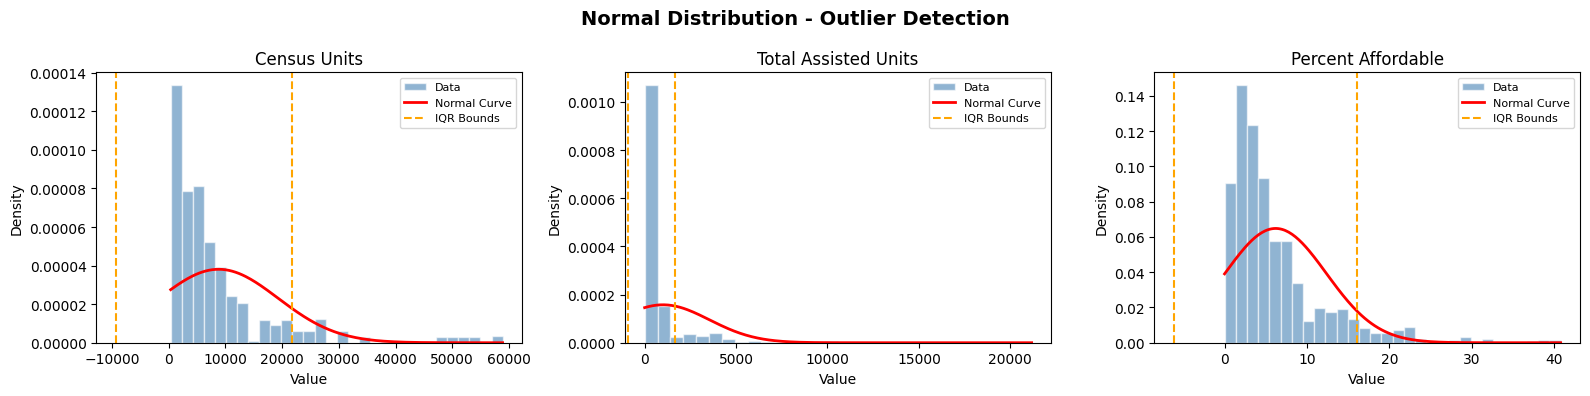

In [47]:
# Outlier Detection (IQR Method)
print("Outlier Detection (IQR):")
for col in ['Census Units', 'Total Assisted Units', 'Percent Affordable']:
    Q1, Q3 = df_clean[col].quantile(0.25), df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    n = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)].shape[0]
    print(f"  {col}: {n} outliers  [bounds: {lower:.2f}, {upper:.2f}]")

# Normal Distribution Plot for Outlier Columns
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Normal Distribution - Outlier Detection", fontsize=14, fontweight='bold')

for ax, col in zip(axes, ['Census Units', 'Total Assisted Units', 'Percent Affordable']):
    data = df_clean[col].dropna()
    mu, std = data.mean(), data.std()
    ax.hist(data, bins=30, color='steelblue', edgecolor='white', density=True, alpha=0.6, label='Data')
    x = np.linspace(data.min(), data.max(), 200)
    ax.plot(x, stats.norm.pdf(x, mu, std), color='red', linewidth=2, label='Normal Curve')
    Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
    IQR = Q3 - Q1
    ax.axvline(Q1 - 1.5 * IQR, color='orange', linestyle='--', linewidth=1.5, label='IQR Bounds')
    ax.axvline(Q3 + 1.5 * IQR, color='orange', linestyle='--', linewidth=1.5)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

In [48]:
# Encode Categorical Variable: Town
le = LabelEncoder()
df_clean['Town_Encoded'] = le.fit_transform(df_clean['Town'])
print(f"Label Encoding applied to 'Town' → 'Town_Encoded'")
print(f"Sample mapping: {dict(zip(le.classes_[:5], le.transform(le.classes_[:5])))}")

Label Encoding applied to 'Town' → 'Town_Encoded'
Sample mapping: {'Andover': np.int64(0), 'Ansonia': np.int64(1), 'Ashford': np.int64(2), 'Avon': np.int64(3), 'Barkhamsted': np.int64(4)}


In [49]:
# 3.9 Feature Engineering
df_clean['Calculated_Pct'] = (df_clean['Total Assisted Units'] / df_clean['Census Units'] * 100).round(2)
df_clean['Period'] = pd.cut(df_clean['Year'],
                             bins=[2010, 2015, 2019, 2023],
                             labels=['2011-2015', '2016-2019', '2020-2023'])

In [50]:
print(f"Final Shape: {df_clean.shape}")
display(df_clean.head(10))

Final Shape: (2197, 13)


,Year,Town Code,Town,Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable,Town_Encoded,Calculated_Pct,Period
0,2023,1,Andover,1324,24,1,26,0,51,3.85,0,3.85,2020-2023
1,2022,1,Andover,1317,24,1,27,0,52,3.95,0,3.95,2020-2023
2,2021,1,Andover,1317,24,1,29,0,54,4.10,0,4.1,2020-2023
3,2020,1,Andover,1317,18,1,32,0,51,3.87,0,3.87,2020-2023
4,2019,1,Andover,1317,18,1,29,0,48,3.64,0,3.64,2016-2019
5,2018,1,Andover,1317,18,2,25,0,45,3.42,0,3.42,2016-2019
6,2017,1,Andover,1317,18,0,24,0,42,3.19,0,3.19,2016-2019
7,2016,1,Andover,1317,18,0,22,0,40,3.04,0,3.04,2016-2019
8,2015,1,Andover,1317,24,0,31,0,55,4.18,0,4.18,2011-2015
9,2014,1,Andover,1317,24,1,32,0,57,4.33,0,4.33,2011-2015


In [51]:
# Save Cleaned Dataset
df_clean.to_csv("../data/Affordable_Housing_Cleaned.csv", index=False)

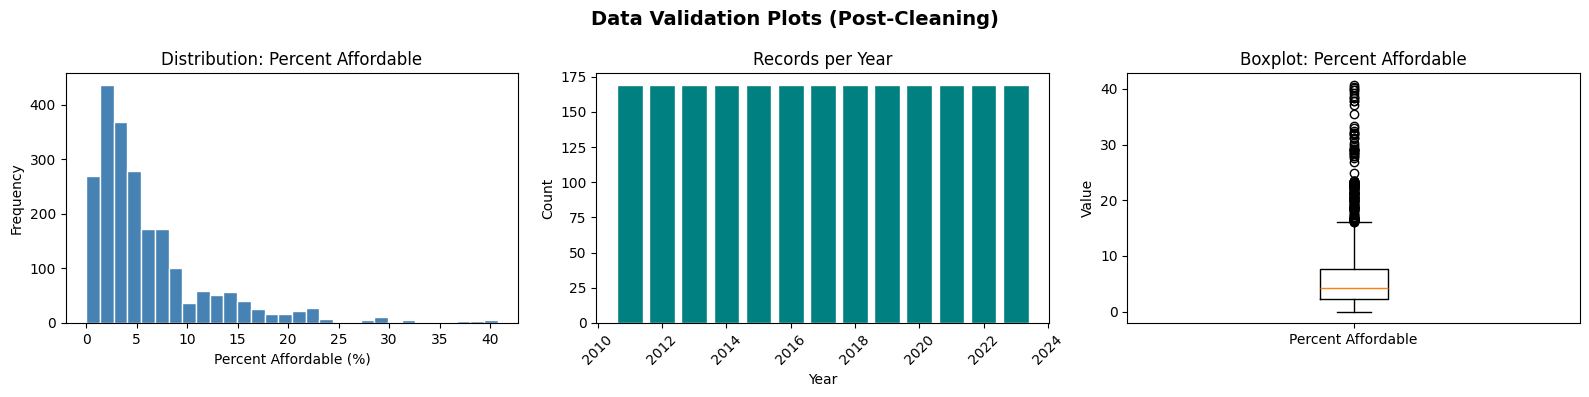

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Data Validation Plots (Post-Cleaning)", fontsize=14, fontweight='bold')

axes[0].hist(df_clean['Percent Affordable'], bins=30, color='steelblue', edgecolor='white')
axes[0].set_title("Distribution: Percent Affordable")
axes[0].set_xlabel("Percent Affordable (%)")
axes[0].set_ylabel("Frequency")

year_counts = df_clean['Year'].value_counts().sort_index()
axes[1].bar(year_counts.index, year_counts.values, color='teal', edgecolor='white')
axes[1].set_title("Records per Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

axes[2].boxplot([df_clean['Percent Affordable'].dropna()], labels=['Percent Affordable'])
axes[2].set_title("Boxplot: Percent Affordable")
axes[2].set_ylabel("Value")

plt.tight_layout()
plt.savefig("validation_plots.png", dpi=150, bbox_inches='tight')
plt.show()
